In [2]:
import pytbl
import panel
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
from tqdm import tqdm
from joblib import Parallel, delayed
from concurrent.futures import ThreadPoolExecutor
from IPython import get_ipython
from IPython.display import display, Javascript
from IPython import get_ipython
from IPython import get_ipython
ip = get_ipython()
path = None
if '__vsc_ipynb_file__' in ip.user_ns:
    path = ip.user_ns['__vsc_ipynb_file__']
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
warnings.filterwarnings("ignore")
begDate    = "20200130"
endData    = "20201123"
sampleDate = "20210421"

from busdates import PortableBusDates
from tqdm import tqdm
pbd = PortableBusDates()
tradingdays = pbd.get_range(begDate, endData)
nodatelist = pbd.get_range("20201123", "20210421")
preface_tradingdays = pbd.get_range(pbd.prev_date(begDate, 122), begDate) + tradingdays
alpha_name = 'herethereout2'#path.split('.')[0].split('/')[-1]

In [ ]:
# root_dir = '/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/'
# sample_1min_df = pytbl.tbl_read(f"{root_dir}{alpha_name}/{20250401}.tbl")
# sample_1min_df['timeHMSf'] = sample_1min_df['rec_epoch'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).strftime("%H:%M:%S.%f"))
# sample_1min_df.set_index(['sid','timeHMSf'], inplace=True)
# sample_1min_df.sort_index().head(200)

In [15]:
failed_dates=[
    "20240219",
    "20240207",
    "20231214",
    "20231024",
    "20240229",
    "20231108",
    "20240325",
    "20231124",
    "20231018",
    "20231122",
]

In [6]:
# sampleDate = "20240409"
root_dir = '/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/'
def loadingfeaturetbl(sampleDate, alpha_name):
    # sample_1min_df = pytbl.tbl_read(f"{root_dir}demo_3/{sampleDate}.tbl")
    sample_1min_df = panel.sdiv2df(
        panel.read(f"{root_dir}{alpha_name}/terms.{sampleDate}.sdiv")
    )
    return sample_1min_df


Process_1min_df = Parallel(n_jobs=100, verbose=10)(
    delayed(loadingfeaturetbl)(sampleDate, alpha_name) for sampleDate in tqdm(tradingdays)
)
Process_1min_df = [Pro for Pro in Process_1min_df if Pro is not None]
feature_1min_df = pd.concat(Process_1min_df, ignore_index=True)
feature_1min_df = feature_1min_df.reset_index()
feature_1min_df['sid'] = feature_1min_df['sid'].astype(int).astype(str)
feature_1min_df = feature_1min_df.set_index(['sid','date','time']).sort_index()

100%|██████████| 199/199 [00:23<00:00,  8.65it/s]
[Parallel(n_jobs=100)]: Done   1 tasks      | elapsed:   27.4s
[Parallel(n_jobs=100)]: Done  20 out of 199 | elapsed:   28.0s remaining:  4.2min
[Parallel(n_jobs=100)]: Done  40 out of 199 | elapsed:   28.7s remaining:  1.9min
[Parallel(n_jobs=100)]: Done  60 out of 199 | elapsed:   29.3s remaining:  1.1min
[Parallel(n_jobs=100)]: Done  80 out of 199 | elapsed:   29.9s remaining:   44.5s
[Parallel(n_jobs=100)]: Done 100 out of 199 | elapsed:   30.6s remaining:   30.3s
[Parallel(n_jobs=100)]: Done 120 out of 199 | elapsed:   31.1s remaining:   20.5s
[Parallel(n_jobs=100)]: Done 140 out of 199 | elapsed:   31.8s remaining:   13.4s
[Parallel(n_jobs=100)]: Done 160 out of 199 | elapsed:   32.3s remaining:    7.9s
[Parallel(n_jobs=100)]: Done 180 out of 199 | elapsed:   32.9s remaining:    3.5s
[Parallel(n_jobs=100)]: Done 199 out of 199 | elapsed:   33.4s finished


In [4]:
# univ = 'midx'
# label_dir = '/data/beer2/data/CA.LTS/CNEQ/Panels/'
# def load_labels_1min(sampleDate, univ):
#     Omin_label = panel.sdiv2df(
#         panel.read(f"{label_dir}Y/Y_v5_1min/terms.{sampleDate}.sdiv").sel(V=slice('ret1h','ret0e'))
#     )
#     active = panel.sdiv2df(
#         panel.read(f"{label_dir}I/fq1m/BB/terms.{sampleDate}.sdiv").sel(V=slice('is.active','is.active'))
#     )
#     univ = panel.sdiv2df(
#         panel.read(f"{label_dir}D/bod/univ/univ-{sampleDate}.sdiv").sel(V=slice(f"{univ}", f"{univ}"))
#     )
#     return Omin_label, active, univ
# Process_label_df = Parallel(n_jobs=100, verbose=10)(
#     delayed(load_labels_1min)(sampleDate, univ) for sampleDate in tqdm(tradingdays)
# )
# label_df  = pd.concat([Process[0] for Process in Process_label_df], ignore_index=True).set_index(['sid','date','time'])
# weight_df = pd.concat([Process[1] for Process in Process_label_df], ignore_index=True).set_index(['sid','date','time'])
# univ_df   = pd.concat([Process[2] for Process in Process_label_df], ignore_index=True).set_index(['sid','date'])

# label_df = label_df.merge(weight_df[['is.active']], left_index=True, right_index=True, how='left')
# label_df = label_df.merge(univ_df, left_index=True, right_index=True, how='left')
# label_df = label_df[label_df[f'{univ}']>0]

# label_df['ret0e_shift'] = label_df.groupby(['sid','date'], group_keys=False)['ret0e'].shift(-1)
# label_df['ret1h_shift'] = label_df.groupby(['sid','date'], group_keys=False)['ret1h'].shift(-1)
# label_df.to_parquet("/data/nfshome/wensheng/git/wensheng_jawN9J/label_df.parquet", engine="pyarrow", compression="snappy")

In [21]:
# sampleDate = "20240409"
root_dir = '/data/nfs0/chinaEquityData/panel/'
def loadingfeaturetbl(sampleDate, alpha_name):
    # sample_1min_df = pytbl.tbl_read(f"{root_dir}demo_3/{sampleDate}.tbl")
    sample_1min_df = panel.sdiv2df(
        panel.read(f"{root_dir}5min/5min-{sampleDate}.sdiv").sel(V = slice("midPriceLastValid", "close.avg"))
    )
    return sample_1min_df


Process_1min_df_2 = Parallel(n_jobs=100, verbose=10)(
    delayed(loadingfeaturetbl)(sampleDate, alpha_name) for sampleDate in tqdm(tradingdays)
)
feature_1min_df_2 = pd.concat(Process_1min_df_2, ignore_index=True)
feature_1min_df_2 = feature_1min_df_2.set_index(['sid','date','time'])

  0%|          | 0/520 [00:00<?, ?it/s][Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done   1 out of   1 | elapsed:   51.1s finished
 38%|███▊      | 200/520 [00:51<01:08,  4.69it/s][Parallel(n_jobs=100)]: Done  22 tasks      | elapsed:   56.6s
[Parallel(n_jobs=100)]: Done  43 tasks      | elapsed:   58.2s
[Parallel(n_jobs=100)]: Done  66 tasks      | elapsed:   60.0s
[Parallel(n_jobs=100)]: Done  89 tasks      | elapsed:  1.0min
 58%|█████▊    | 300/520 [01:02<00:36,  6.00it/s][Parallel(n_jobs=100)]: Done 114 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 139 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 166 tasks      | elapsed:  1.1min
[Parallel(n_jobs=100)]: Done 193 tasks      | elapsed:  1.2min
 77%|███████▋  | 400/520 [01:11<00:16,  7.39it/s][Parallel(n_jobs=100)]: Done 222 tasks      | elapsed:  1.2min
[Parallel(n_jobs=100)]: Done 251 tasks      | elapsed:  1.3min
[Parallel(n_jobs=100)]: Done 282 

In [27]:
feature_1min_df.columns

Index(['index', 'NoVolLastDown_B_Qty', 'NoVolFirstDown_B_Qty',
       'NoPeriodvolDown_B_Qty', 'NoVolDown_B_Amt', 'NoVolDown_B_orderQty',
       'NoVolLastDown_S_Qty', 'NoVolFirstDown_S_Qty', 'NoPeriodvolDown_S_Qty',
       'NoVolDown_S_Amt', 'NoVolDown_S_orderQty', 'NoVolLastUp_B_Qty',
       'NoVolFirstUp_B_Qty', 'NoPeriodvolUp_B_Qty', 'NoVolUp_B_Amt',
       'NoVolUp_B_orderQty', 'NoVolLastUp_S_Qty', 'NoVolFirstUp_S_Qty',
       'NoPeriodvolUp_S_Qty', 'NoVolUp_S_Amt', 'NoVolUp_S_orderQty',
       'Qtytrans_all', 'Amttrans_all', 'NoVolLastDown_BSratio',
       'NoVolLastDown_BSminusall', 'NoVolLastDown_BQdivall',
       'NoVolLastDown_SQdivall', 'NoVolFirstDown_BSratio',
       'NoVolFirstDown_BSminusall', 'NoVolFirstDown_BQdivall',
       'NoVolFirstDown_SQdivall', 'NoPeriodvolDown_BSratio',
       'NoPeriodvolDown_BSminusall', 'NoPeriodvolDown_BQdivall',
       'NoPeriodvolDown_SQdivall', 'NoVolFirstUp_BSratio',
       'NoVolFirstUp_BSminusall', 'NoVolFirstUp_BQdivall',
       'NoV

In [7]:
label_df = pd.read_parquet("/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/label_df_2020_2023.parquet")
cols = ['NoVolLastDown', 'NoVolFirstDown', 'NoPeriodvolDown', 'NoVolFirstUp', 'NoVolFirstUp', 'NoPeriodvolUp']
for col in cols:
    feature_1min_df[f'{col}_BSratio'] = (feature_1min_df[f'{col}_S_Qty'] - feature_1min_df[f'{col}_B_Qty']) / (feature_1min_df[f'{col}_S_Qty'] + feature_1min_df[f'{col}_B_Qty']) 
    feature_1min_df[f'{col}_BSminusall'] = (feature_1min_df[f'{col}_S_Qty'] - feature_1min_df[f'{col}_B_Qty']) / (feature_1min_df['Qtytrans_all']) 


    feature_1min_df[f'{col}_BQdivall'] = (feature_1min_df[f'{col}_B_Qty']) / (feature_1min_df['Qtytrans_all']) 
    feature_1min_df[f'{col}_SQdivall'] = (feature_1min_df[f'{col}_S_Qty'] ) / (feature_1min_df['Qtytrans_all']) 

feature_1min_df['NoVolDown_B_Qty'] = feature_1min_df['NoVolLastDown_B_Qty']
feature_1min_df['NoVolUp_B_Qty'] = feature_1min_df['NoVolLastUp_B_Qty']
feature_1min_df['NoVolDown_S_Qty'] = feature_1min_df['NoVolLastDown_S_Qty']
feature_1min_df['NoVolUp_S_Qty'] = feature_1min_df['NoVolLastUp_S_Qty']

cols = ['NoVolDown', 'NoVolUp']
for col in cols:
    feature_1min_df[f'{col}_Sorderdivall'] = (feature_1min_df[f'{col}_S_Qty'] + feature_1min_df[f'{col}_S_orderQty'] ) / (feature_1min_df['Qtytrans_all']) 
    feature_1min_df[f'{col}_Borderdivall'] = (feature_1min_df[f'{col}_B_Qty'] + feature_1min_df[f'{col}_B_orderQty'] ) / (feature_1min_df['Qtytrans_all']) 

    feature_1min_df[f'{col}_AmtBSRatio'] = (feature_1min_df[f'{col}_S_Amt'] - feature_1min_df[f'{col}_B_Amt']) / (feature_1min_df[f'{col}_S_Amt'] + feature_1min_df[f'{col}_B_Amt']) 
    feature_1min_df[f'{col}_BSminusall'] = (feature_1min_df[f'{col}_S_Amt'] - feature_1min_df[f'{col}_B_Amt']) / (feature_1min_df['Amttrans_all']) 


    feature_1min_df[f'{col}_BQdivall'] = (feature_1min_df[f'{col}_B_Qty']) / (feature_1min_df['Qtytrans_all']) 
    feature_1min_df[f'{col}_SQdivall'] = (feature_1min_df[f'{col}_S_Qty'] ) / (feature_1min_df['Qtytrans_all']) 

    feature_1min_df[f'{col}_BordermSQdivall'] = (feature_1min_df[f'{col}_B_Qty'] + feature_1min_df[f'{col}_B_orderQty'] -  feature_1min_df[f'{col}_S_Qty']) / (feature_1min_df['Qtytrans_all']) 
    feature_1min_df[f'{col}_SordermSBdivall'] = (feature_1min_df[f'{col}_S_Qty'] + feature_1min_df[f'{col}_S_orderQty'] -  feature_1min_df[f'{col}_B_Qty']) / (feature_1min_df['Qtytrans_all']) 



In [8]:
# feature_1min_df['close.avg'] = feature_1min_df_2['close.avg']
# feature_1min_df['close']     = feature_1min_df_2['close']
# feature_1min_df['avg_minus_close'] = (feature_1min_df['close.avg'] - feature_1min_df['close']) / feature_1min_df['close']

In [9]:
feature_all_df = feature_1min_df.merge(label_df[['ret1h','ret0e','is.active','ret0e_shift','ret1h_shift']], left_index=True, right_index=True, how='inner')
feature_all_df = feature_all_df[(feature_all_df['is.active']>0)]

In [10]:
feature_all_df.columns

Index(['index', 'NoVolLastDown_B_Qty', 'NoVolFirstDown_B_Qty',
       'NoPeriodvolDown_B_Qty', 'NoVolDown_B_Amt', 'NoVolDown_B_orderQty',
       'NoVolLastDown_S_Qty', 'NoVolFirstDown_S_Qty', 'NoPeriodvolDown_S_Qty',
       'NoVolDown_S_Amt', 'NoVolDown_S_orderQty', 'NoVolLastUp_B_Qty',
       'NoVolFirstUp_B_Qty', 'NoPeriodvolUp_B_Qty', 'NoVolUp_B_Amt',
       'NoVolUp_B_orderQty', 'NoVolLastUp_S_Qty', 'NoVolFirstUp_S_Qty',
       'NoPeriodvolUp_S_Qty', 'NoVolUp_S_Amt', 'NoVolUp_S_orderQty',
       'Qtytrans_all', 'Amttrans_all', 'NoVolLastDown_BSratio',
       'NoVolLastDown_BSminusall', 'NoVolLastDown_BQdivall',
       'NoVolLastDown_SQdivall', 'NoVolFirstDown_BSratio',
       'NoVolFirstDown_BSminusall', 'NoVolFirstDown_BQdivall',
       'NoVolFirstDown_SQdivall', 'NoPeriodvolDown_BSratio',
       'NoPeriodvolDown_BSminusall', 'NoPeriodvolDown_BQdivall',
       'NoPeriodvolDown_SQdivall', 'NoVolFirstUp_BSratio',
       'NoVolFirstUp_BSminusall', 'NoVolFirstUp_BQdivall',
       'NoV

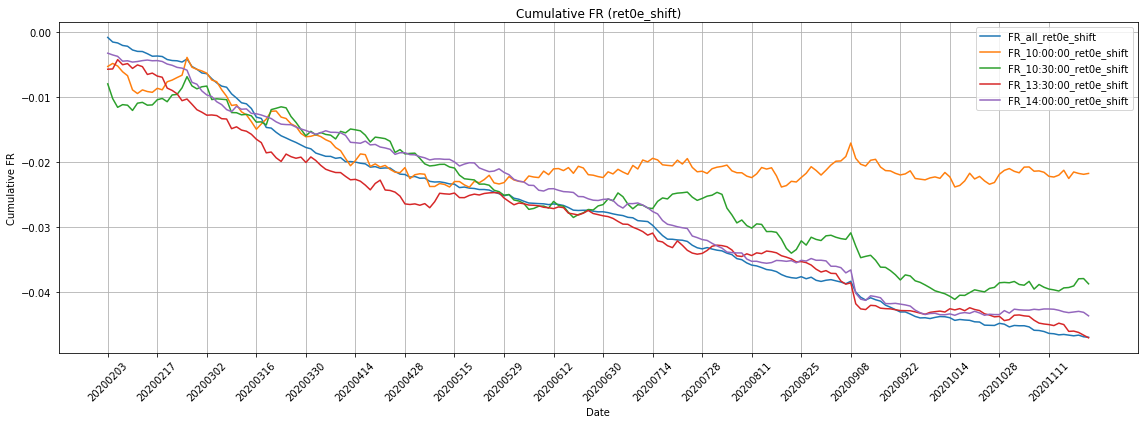

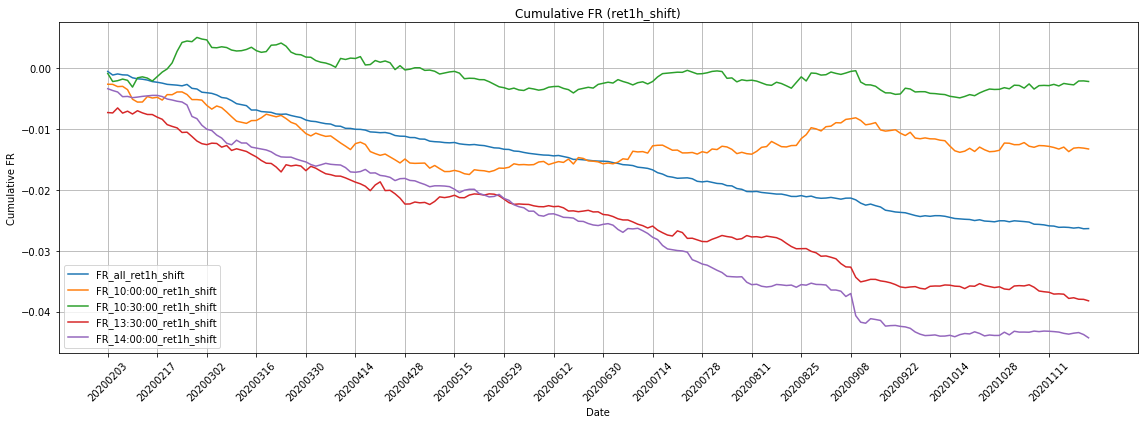

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你已经有以下变量
feat_col = 'NoVolUp_Borderdivall'
ret_cols = ['ret0e_shift', 'ret1h_shift']
time_points = ['10:00:00', '10:30:00', '13:30:00', '14:00:00']

df = feature_all_df.reset_index()

# ---------- 全部时间点 (FR_all_*) ----------
fr_all_results = {}
for ret_col in ret_cols:
    sub_df = df[[feat_col, ret_col, 'date']].dropna()

    # 按date groupby，计算 FR = cov(x, y) / std(x)
    grouped = sub_df.groupby('date')
    mean_x = grouped[feat_col].transform('mean')
    mean_y = grouped[ret_col].transform('mean')
    std_x = grouped[feat_col].transform('std')

    cov_xy = ((sub_df[feat_col] - mean_x) * (sub_df[ret_col] - mean_y)).groupby(sub_df['date']).mean()
    std_x_daily = std_x.groupby(sub_df['date']).first()  # std(x)是一样的，随便取一个就行

    fr = cov_xy / std_x_daily.replace(0, np.nan)
    fr_all_results[f'FR_all_{ret_col}'] = fr

# ---------- 特定时间点 (FR_{time}_{ret_col}) ----------
fr_time_results = {}

for tp in time_points:
    df_tp = df[df['time'] == tp].dropna(subset=[feat_col] + ret_cols)
    for ret_col in ret_cols:
        grouped = df_tp.groupby('date')
        x = df_tp[feat_col]
        y = df_tp[ret_col]
        mean_x = grouped[feat_col].transform('mean')
        mean_y = grouped[ret_col].transform('mean')
        std_x = grouped[feat_col].transform('std')

        cov_xy = ((x - mean_x) * (y - mean_y)).groupby(df_tp['date']).mean()
        std_x_daily = std_x.groupby(df_tp['date']).first()

        fr = cov_xy / std_x_daily.replace(0, np.nan)
        fr_time_results[f'FR_{tp}_{ret_col}'] = fr

# 合并所有结果
fr_all_df = pd.DataFrame(fr_all_results)
fr_time_df = pd.DataFrame(fr_time_results)
fr_df = pd.concat([fr_all_df, fr_time_df], axis=1)

# 计算 cumulative FR
cumulative_fr_df = fr_df.cumsum()


# 分别提取 ret0e 和 ret1h 的 FR 列
fr_0e_cols = [col for col in cumulative_fr_df.columns if 'ret0e_shift' in col]
fr_1h_cols = [col for col in cumulative_fr_df.columns if 'ret1h_shift' in col]

# 画 ret0e_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_0e_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret0e_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

# 画 ret1h_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_1h_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret1h_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

if save_FR:
    fr_df.to_parquet(f'/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/fr_save/{feat_col}.parquet', engine="pyarrow", compression="snappy")
    
save_FR = False

In [20]:
save_FR = True

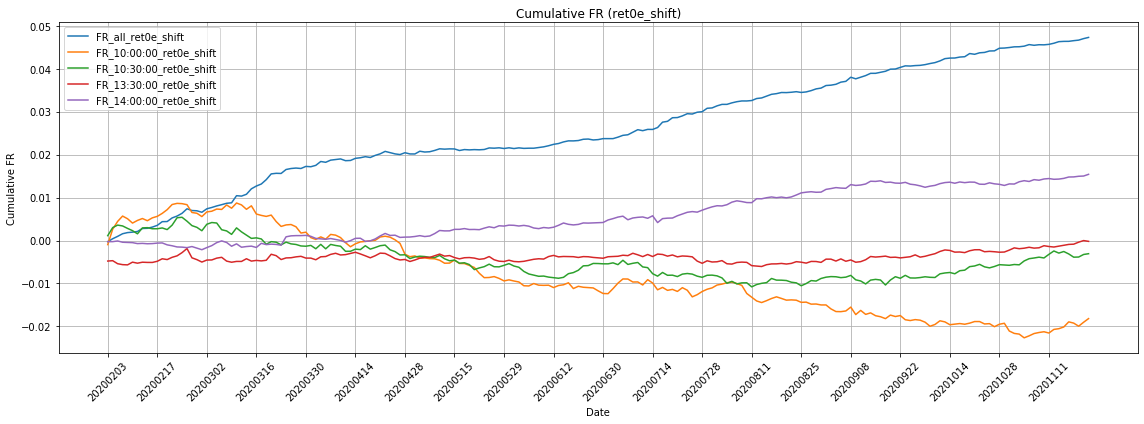

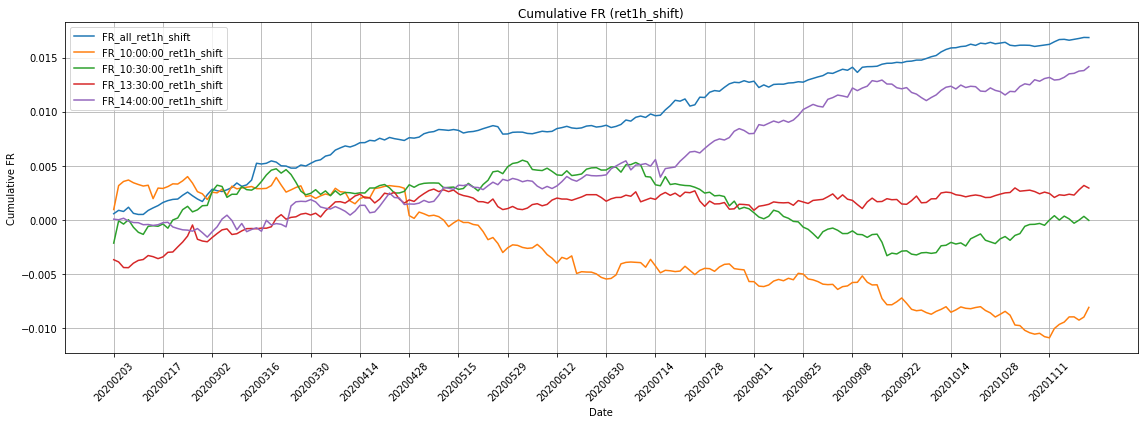

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你已经有以下变量
feat_col = 'NoVolDown_SQdivall'
ret_cols = ['ret0e_shift', 'ret1h_shift']
time_points = ['10:00:00', '10:30:00', '13:30:00', '14:00:00']

df = feature_all_df.reset_index()

# ---------- 全部时间点 (FR_all_*) ----------
fr_all_results = {}
for ret_col in ret_cols:
    sub_df = df[[feat_col, ret_col, 'date']].dropna()

    # 按date groupby，计算 FR = cov(x, y) / std(x)
    grouped = sub_df.groupby('date')
    mean_x = grouped[feat_col].transform('mean')
    mean_y = grouped[ret_col].transform('mean')
    std_x = grouped[feat_col].transform('std')

    cov_xy = ((sub_df[feat_col] - mean_x) * (sub_df[ret_col] - mean_y)).groupby(sub_df['date']).mean()
    std_x_daily = std_x.groupby(sub_df['date']).first()  # std(x)是一样的，随便取一个就行

    fr = cov_xy / std_x_daily.replace(0, np.nan)
    fr_all_results[f'FR_all_{ret_col}'] = fr

# ---------- 特定时间点 (FR_{time}_{ret_col}) ----------
fr_time_results = {}

for tp in time_points:
    df_tp = df[df['time'] == tp].dropna(subset=[feat_col] + ret_cols)
    for ret_col in ret_cols:
        grouped = df_tp.groupby('date')
        x = df_tp[feat_col]
        y = df_tp[ret_col]
        mean_x = grouped[feat_col].transform('mean')
        mean_y = grouped[ret_col].transform('mean')
        std_x = grouped[feat_col].transform('std')

        cov_xy = ((x - mean_x) * (y - mean_y)).groupby(df_tp['date']).mean()
        std_x_daily = std_x.groupby(df_tp['date']).first()

        fr = cov_xy / std_x_daily.replace(0, np.nan)
        fr_time_results[f'FR_{tp}_{ret_col}'] = fr

# 合并所有结果
fr_all_df = pd.DataFrame(fr_all_results)
fr_time_df = pd.DataFrame(fr_time_results)
fr_df = pd.concat([fr_all_df, fr_time_df], axis=1)

# 计算 cumulative FR
cumulative_fr_df = fr_df.cumsum()


# 分别提取 ret0e 和 ret1h 的 FR 列
fr_0e_cols = [col for col in cumulative_fr_df.columns if 'ret0e_shift' in col]
fr_1h_cols = [col for col in cumulative_fr_df.columns if 'ret1h_shift' in col]

# 画 ret0e_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_0e_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret0e_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

# 画 ret1h_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_1h_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret1h_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

if save_FR:
    fr_df.to_parquet(f'/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/fr_save/{feat_col}.parquet', engine="pyarrow", compression="snappy")
    
save_FR = False

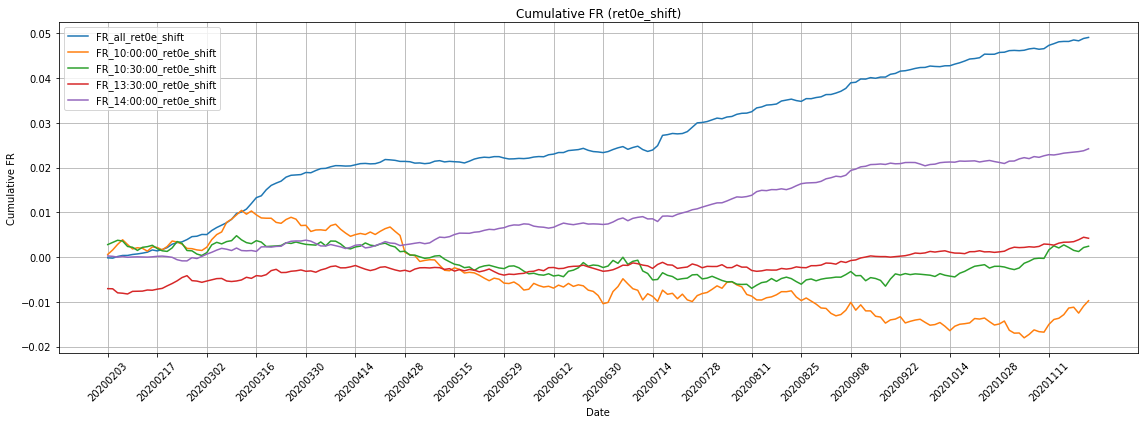

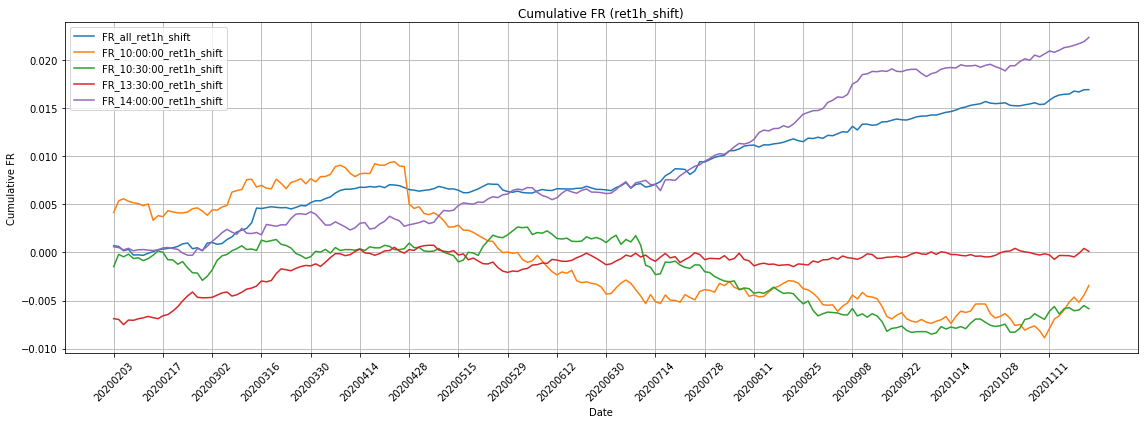

In [23]:
save_FR = True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你已经有以下变量
feat_col = 'NoVolLastDown_BSminusall'
ret_cols = ['ret0e_shift', 'ret1h_shift']
time_points = ['10:00:00', '10:30:00', '13:30:00', '14:00:00']

df = feature_all_df.reset_index()

# ---------- 全部时间点 (FR_all_*) ----------
fr_all_results = {}
for ret_col in ret_cols:
    sub_df = df[[feat_col, ret_col, 'date']].dropna()

    # 按date groupby，计算 FR = cov(x, y) / std(x)
    grouped = sub_df.groupby('date')
    mean_x = grouped[feat_col].transform('mean')
    mean_y = grouped[ret_col].transform('mean')
    std_x = grouped[feat_col].transform('std')

    cov_xy = ((sub_df[feat_col] - mean_x) * (sub_df[ret_col] - mean_y)).groupby(sub_df['date']).mean()
    std_x_daily = std_x.groupby(sub_df['date']).first()  # std(x)是一样的，随便取一个就行

    fr = cov_xy / std_x_daily.replace(0, np.nan)
    fr_all_results[f'FR_all_{ret_col}'] = fr

# ---------- 特定时间点 (FR_{time}_{ret_col}) ----------
fr_time_results = {}

for tp in time_points:
    df_tp = df[df['time'] == tp].dropna(subset=[feat_col] + ret_cols)
    for ret_col in ret_cols:
        grouped = df_tp.groupby('date')
        x = df_tp[feat_col]
        y = df_tp[ret_col]
        mean_x = grouped[feat_col].transform('mean')
        mean_y = grouped[ret_col].transform('mean')
        std_x = grouped[feat_col].transform('std')

        cov_xy = ((x - mean_x) * (y - mean_y)).groupby(df_tp['date']).mean()
        std_x_daily = std_x.groupby(df_tp['date']).first()

        fr = cov_xy / std_x_daily.replace(0, np.nan)
        fr_time_results[f'FR_{tp}_{ret_col}'] = fr

# 合并所有结果
fr_all_df = pd.DataFrame(fr_all_results)
fr_time_df = pd.DataFrame(fr_time_results)
fr_df = pd.concat([fr_all_df, fr_time_df], axis=1)

# 计算 cumulative FR
cumulative_fr_df = fr_df.cumsum()


# 分别提取 ret0e 和 ret1h 的 FR 列
fr_0e_cols = [col for col in cumulative_fr_df.columns if 'ret0e_shift' in col]
fr_1h_cols = [col for col in cumulative_fr_df.columns if 'ret1h_shift' in col]

# 画 ret0e_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_0e_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret0e_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

# 画 ret1h_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_1h_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret1h_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

if save_FR:
    fr_df.to_parquet(f'/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/fr_save/{feat_col}.parquet', engine="pyarrow", compression="snappy")
    
save_FR = False

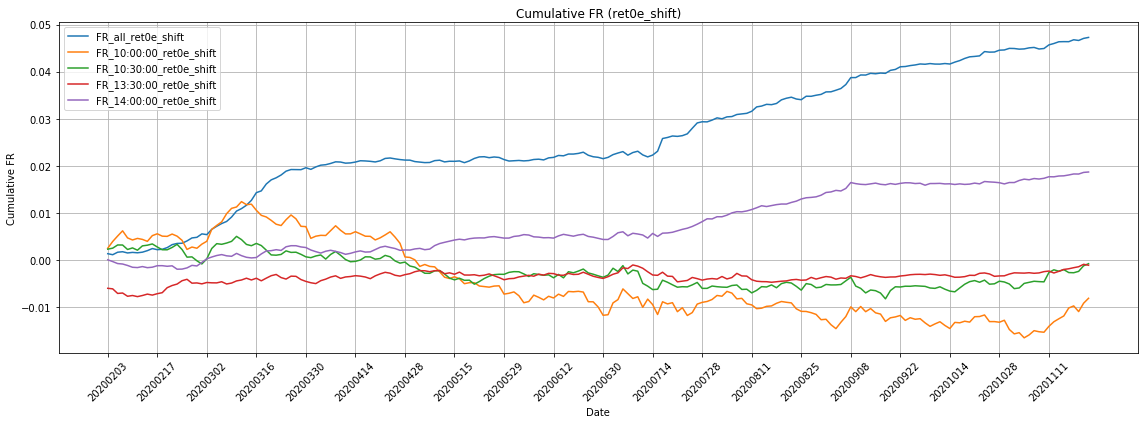

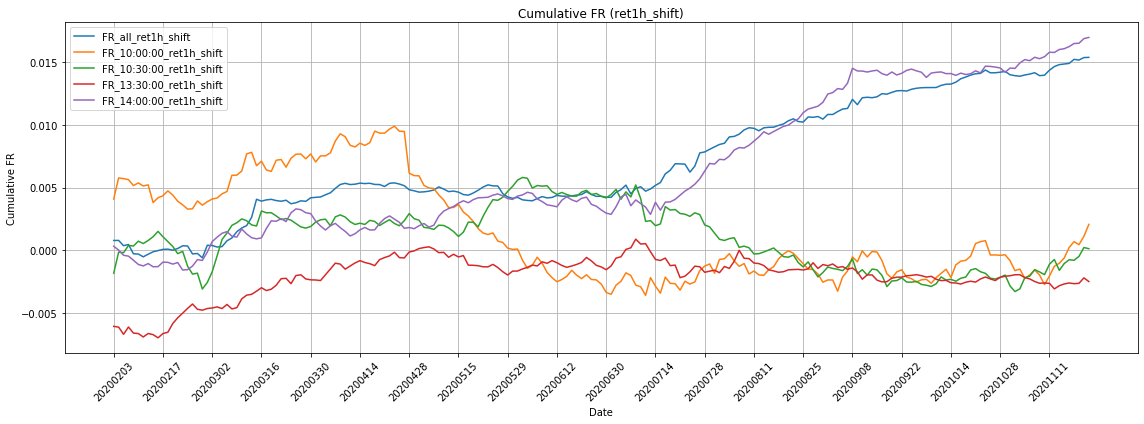

In [25]:
save_FR = True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设你已经有以下变量
feat_col = 'NoPeriodvolDown_BSminusall'
ret_cols = ['ret0e_shift', 'ret1h_shift']
time_points = ['10:00:00', '10:30:00', '13:30:00', '14:00:00']

df = feature_all_df.reset_index()

# ---------- 全部时间点 (FR_all_*) ----------
fr_all_results = {}
for ret_col in ret_cols:
    sub_df = df[[feat_col, ret_col, 'date']].dropna()

    # 按date groupby，计算 FR = cov(x, y) / std(x)
    grouped = sub_df.groupby('date')
    mean_x = grouped[feat_col].transform('mean')
    mean_y = grouped[ret_col].transform('mean')
    std_x = grouped[feat_col].transform('std')

    cov_xy = ((sub_df[feat_col] - mean_x) * (sub_df[ret_col] - mean_y)).groupby(sub_df['date']).mean()
    std_x_daily = std_x.groupby(sub_df['date']).first()  # std(x)是一样的，随便取一个就行

    fr = cov_xy / std_x_daily.replace(0, np.nan)
    fr_all_results[f'FR_all_{ret_col}'] = fr

# ---------- 特定时间点 (FR_{time}_{ret_col}) ----------
fr_time_results = {}

for tp in time_points:
    df_tp = df[df['time'] == tp].dropna(subset=[feat_col] + ret_cols)
    for ret_col in ret_cols:
        grouped = df_tp.groupby('date')
        x = df_tp[feat_col]
        y = df_tp[ret_col]
        mean_x = grouped[feat_col].transform('mean')
        mean_y = grouped[ret_col].transform('mean')
        std_x = grouped[feat_col].transform('std')

        cov_xy = ((x - mean_x) * (y - mean_y)).groupby(df_tp['date']).mean()
        std_x_daily = std_x.groupby(df_tp['date']).first()

        fr = cov_xy / std_x_daily.replace(0, np.nan)
        fr_time_results[f'FR_{tp}_{ret_col}'] = fr

# 合并所有结果
fr_all_df = pd.DataFrame(fr_all_results)
fr_time_df = pd.DataFrame(fr_time_results)
fr_df = pd.concat([fr_all_df, fr_time_df], axis=1)

# 计算 cumulative FR
cumulative_fr_df = fr_df.cumsum()


# 分别提取 ret0e 和 ret1h 的 FR 列
fr_0e_cols = [col for col in cumulative_fr_df.columns if 'ret0e_shift' in col]
fr_1h_cols = [col for col in cumulative_fr_df.columns if 'ret1h_shift' in col]

# 画 ret0e_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_0e_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret0e_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

# 画 ret1h_shift 的 Cumulative FR 图
plt.figure(figsize=(16, 6))
for col in fr_1h_cols:
    plt.plot(cumulative_fr_df.index, cumulative_fr_df[col], label=col)

plt.title('Cumulative FR (ret1h_shift)')
plt.xlabel('Date')
plt.ylabel('Cumulative FR')
plt.legend()
plt.grid(True)
plt.xticks(cumulative_fr_df.index[::10], rotation=45)
plt.tight_layout()
plt.show()

if save_FR:
    fr_df.to_parquet(f'/data/beef3/mike/pshared/GAlpha_custom_build/wensheng_jawN9J/fr_save/{feat_col}.parquet', engine="pyarrow", compression="snappy")
    
save_FR = False